<a href="https://colab.research.google.com/github/lapatradaa/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

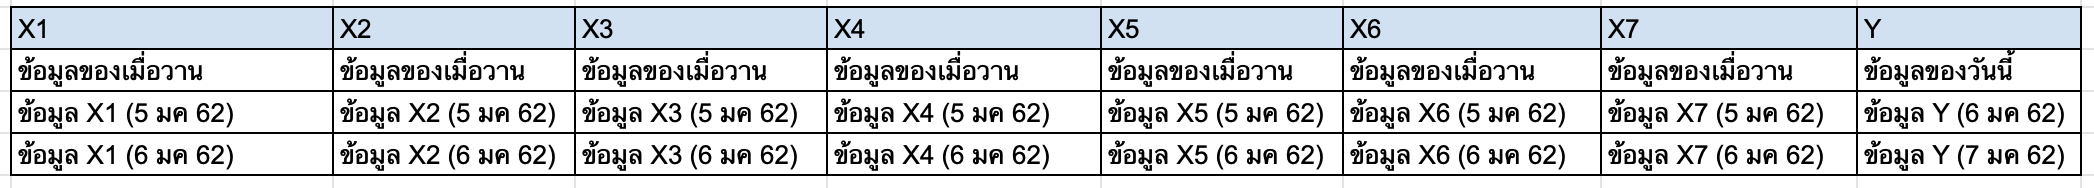

In [282]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
import pandas as pd
import numpy as np
import os

#import data

In [284]:
#ความกด(เปอร์เซ็นต์)(atm)
atm_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
atm_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
atm_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
atm_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
atm_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความชื้นสัมพัทธ์(เปอร์เซ็นต์) relative humidity
rh_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
rh_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
rh_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
rh_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
rh_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความเร็วลม(นอต)
wind_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
wind_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
wind_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
wind_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
wind_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)

#จำนวนเมฆ(10ส่วน)
cloud_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
cloud_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
cloud_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
cloud_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
cloud_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)

#ปริมาณฝน(มิลลิเมตร)
rain_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
rain_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
rain_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
rain_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
rain_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)

#อุณหภูมิจุดน้ำค้าง(เซลเซียส) dew point temperature
dp_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dp_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dp_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dp_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dp_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิตุ้มแห้ง(เซลเซียส) dry
dry_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dry_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dry_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dry_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dry_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิต่ำสุด(เซลเซียส)
low_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
low_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
low_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
low_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
low_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)

#ความกด(เปอร์เซ็นต์)(atm)

In [285]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'atm'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

atm_kkn_processed = process_dataframe(atm_kkn)
atm_kkn_processed

,Unnamed: 2,day,atm,จังหวัด
0,2011-10,1,1005.47,ขอนแก่น
1,2011-10,2,1006.65,ขอนแก่น
2,2011-10,3,1007.49,ขอนแก่น
3,2011-10,4,1008.28,ขอนแก่น
4,2011-10,5,1009.88,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,1014.37,ขอนแก่น
1701,2022-02,28,1013.04,ขอนแก่น
1702,2022-02,29,1013.37,ขอนแก่น
1703,2022-02,30,1013.98,ขอนแก่น


In [286]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'atm'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a

atm_npm_processed = process_dataframe(atm_npm)
atm_npm_processed

,Unnamed: 2,day,atm,จังหวัด
0,2011-10,1,1006.3,นครพนม
1,2011-10,2,1007.38,นครพนม
2,2011-10,3,1008.07,นครพนม
3,2011-10,4,1008.44,นครพนม
4,2011-10,5,1010.51,นครพนม
...,...,...,...,...
1700,2022-02,27,1016.43,นครพนม
1701,2022-02,28,1013.53,นครพนม
1702,2022-02,29,1013.37,นครพนม
1703,2022-02,30,1013.98,นครพนม


In [287]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'atm'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

atm_snk_processed = process_dataframe(atm_snk)
atm_snk_processed

,Unnamed: 2,day,atm,จังหวัด
0,2011-10,1,1005.84,สกลนคร
1,2011-10,2,1007.16,สกลนคร
2,2011-10,3,1007.87,สกลนคร
3,2011-10,4,1008.56,สกลนคร
4,2011-10,5,1010.55,สกลนคร
...,...,...,...,...
1700,2022-02,27,1014.95,สกลนคร
1701,2022-02,28,1012.89,สกลนคร
1702,2022-02,29,1013.37,สกลนคร
1703,2022-02,30,1013.98,สกลนคร


In [288]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'atm'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

atm_nki_processed = process_dataframe(atm_nki)
atm_nki_processed

,Unnamed: 2,day,atm,จังหวัด
0,2011-10,1,1005.34,หนองคาย
1,2011-10,2,1006.67,หนองคาย
2,2011-10,3,1007.39,หนองคาย
3,2011-10,4,1008.11,หนองคาย
4,2011-10,5,1009.69,หนองคาย
...,...,...,...,...
1700,2022-02,27,1015.31,หนองคาย
1701,2022-02,28,1013.06,หนองคาย
1702,2022-02,29,1012.52,หนองคาย
1703,2022-02,30,1012.52,หนองคาย


In [289]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'atm'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

atm_lei_processed = process_dataframe(atm_lei)
atm_lei_processed

,Unnamed: 2,day,atm,จังหวัด
0,2011-10,1,1005.12,เลย
1,2011-10,2,1006.51,เลย
2,2011-10,3,1007.81,เลย
3,2011-10,4,1008.15,เลย
4,2011-10,5,1009.21,เลย
...,...,...,...,...
1700,2022-02,27,1014.97,เลย
1701,2022-02,28,1012.88,เลย
1702,2022-02,29,1012.37,เลย
1703,2022-02,30,1012.37,เลย


#ความชื้นสัมพัทธ์(เปอร์เซ็นต์) relative humidity


In [290]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rh'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

rh_kkn_processed = process_dataframe(rh_kkn)
rh_kkn_processed

,Unnamed: 2,day,rh,จังหวัด
0,2011-10,1,83,ขอนแก่น
1,2011-10,2,92,ขอนแก่น
2,2011-10,3,86,ขอนแก่น
3,2011-10,4,80,ขอนแก่น
4,2011-10,5,86,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,58,ขอนแก่น
1701,2022-02,28,62,ขอนแก่น
1702,2022-02,29,68.61,ขอนแก่น
1703,2022-02,30,68.61,ขอนแก่น


In [291]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rh'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
rh_npm_processed = process_dataframe(rh_npm)
rh_npm_processed

,Unnamed: 2,day,rh,จังหวัด
0,2011-10,1,95,นครพนม
1,2011-10,2,84,นครพนม
2,2011-10,3,74,นครพนม
3,2011-10,4,72,นครพนม
4,2011-10,5,87,นครพนม
...,...,...,...,...
1700,2022-02,27,52,นครพนม
1701,2022-02,28,60,นครพนม
1702,2022-02,29,64.21,นครพนม
1703,2022-02,30,64.21,นครพนม


In [292]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rh'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

rh_snk_processed = process_dataframe(rh_snk)
rh_snk_processed

,Unnamed: 2,day,rh,จังหวัด
0,2011-10,1,87,สกลนคร
1,2011-10,2,88,สกลนคร
2,2011-10,3,77,สกลนคร
3,2011-10,4,75,สกลนคร
4,2011-10,5,87,สกลนคร
...,...,...,...,...
1700,2022-02,27,65,สกลนคร
1701,2022-02,28,68,สกลนคร
1702,2022-02,29,73.46,สกลนคร
1703,2022-02,30,73.46,สกลนคร


In [293]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rh'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

rh_nki_processed = process_dataframe(rh_nki)
rh_nki_processed

,Unnamed: 2,day,rh,จังหวัด
0,2011-10,1,89,หนองคาย
1,2011-10,2,91,หนองคาย
2,2011-10,3,78,หนองคาย
3,2011-10,4,75,หนองคาย
4,2011-10,5,90,หนองคาย
...,...,...,...,...
1700,2022-02,27,62,หนองคาย
1701,2022-02,28,65,หนองคาย
1702,2022-02,29,71.36,หนองคาย
1703,2022-02,30,71.36,หนองคาย


In [294]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rh'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

rh_lei_processed = process_dataframe(rh_lei)
rh_lei_processed

,Unnamed: 2,day,rh,จังหวัด
0,2011-10,1,90,เลย
1,2011-10,2,95,เลย
2,2011-10,3,92,เลย
3,2011-10,4,89,เลย
4,2011-10,5,86,เลย
...,...,...,...,...
1700,2022-02,27,74,เลย
1701,2022-02,28,72,เลย
1702,2022-02,29,79.68,เลย
1703,2022-02,30,79.68,เลย


#ความเร็วลม(นอต)


In [295]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'wind'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

wind_kkn_processed = process_dataframe(wind_kkn)
wind_kkn_processed

,Unnamed: 2,day,wind,จังหวัด
0,2011-10,1,3,ขอนแก่น
1,2011-10,2,2,ขอนแก่น
2,2011-10,3,3,ขอนแก่น
3,2011-10,4,2,ขอนแก่น
4,2011-10,5,2,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,2,ขอนแก่น
1701,2022-02,28,2,ขอนแก่น
1702,2022-02,29,2.57,ขอนแก่น
1703,2022-02,30,2.57,ขอนแก่น


In [296]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'wind'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
wind_npm_processed = process_dataframe(wind_npm)
wind_npm_processed

,Unnamed: 2,day,wind,จังหวัด
0,2011-10,1,1,นครพนม
1,2011-10,2,1,นครพนม
2,2011-10,3,2,นครพนม
3,2011-10,4,2,นครพนม
4,2011-10,5,1,นครพนม
...,...,...,...,...
1700,2022-02,27,2,นครพนม
1701,2022-02,28,1,นครพนม
1702,2022-02,29,2.14,นครพนม
1703,2022-02,30,2.14,นครพนม


In [297]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'wind'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

wind_snk_processed = process_dataframe(wind_snk)
wind_snk_processed

,Unnamed: 2,day,wind,จังหวัด
0,2011-10,1,1,สกลนคร
1,2011-10,2,1,สกลนคร
2,2011-10,3,2,สกลนคร
3,2011-10,4,2,สกลนคร
4,2011-10,5,1,สกลนคร
...,...,...,...,...
1700,2022-02,27,3,สกลนคร
1701,2022-02,28,2,สกลนคร
1702,2022-02,29,3.04,สกลนคร
1703,2022-02,30,3.04,สกลนคร


In [298]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'wind'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

wind_nki_processed = process_dataframe(wind_nki)
wind_nki_processed

,Unnamed: 2,day,wind,จังหวัด
0,2011-10,1,1,หนองคาย
1,2011-10,2,4,หนองคาย
2,2011-10,3,4,หนองคาย
3,2011-10,4,2,หนองคาย
4,2011-10,5,1,หนองคาย
...,...,...,...,...
1700,2022-02,27,2,หนองคาย
1701,2022-02,28,2,หนองคาย
1702,2022-02,29,2.39,หนองคาย
1703,2022-02,30,2.39,หนองคาย


In [299]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'wind'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

wind_lei_processed = process_dataframe(wind_lei)
wind_lei_processed

,Unnamed: 2,day,wind,จังหวัด
0,2011-10,1,2,เลย
1,2011-10,2,2,เลย
2,2011-10,3,3,เลย
3,2011-10,4,2,เลย
4,2011-10,5,3,เลย
...,...,...,...,...
1700,2022-02,27,1,เลย
1701,2022-02,28,1,เลย
1702,2022-02,29,1.68,เลย
1703,2022-02,30,1.68,เลย


#จำนวนเมฆ(10ส่วน)


In [300]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'cloud'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

cloud_kkn_processed = process_dataframe(cloud_kkn)
cloud_kkn_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1,9,ขอนแก่น
1,2011-10,2,10,ขอนแก่น
2,2011-10,3,10,ขอนแก่น
3,2011-10,4,8,ขอนแก่น
4,2011-10,5,10,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,2,ขอนแก่น
1701,2022-02,28,2,ขอนแก่น
1702,2022-02,29,2.57,ขอนแก่น
1703,2022-02,30,2.57,ขอนแก่น


In [301]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'cloud'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
cloud_npm_processed = process_dataframe(cloud_npm)
cloud_npm_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1,10,นครพนม
1,2011-10,2,7,นครพนม
2,2011-10,3,8,นครพนม
3,2011-10,4,8,นครพนม
4,2011-10,5,10,นครพนม
...,...,...,...,...
1700,2022-02,27,1,นครพนม
1701,2022-02,28,0,นครพนม
1702,2022-02,29,4.52,นครพนม
1703,2022-02,30,4.52,นครพนม


In [302]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'cloud'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

cloud_snk_processed = process_dataframe(cloud_snk)
cloud_snk_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1,9,สกลนคร
1,2011-10,2,9,สกลนคร
2,2011-10,3,7,สกลนคร
3,2011-10,4,7,สกลนคร
4,2011-10,5,9,สกลนคร
...,...,...,...,...
1700,2022-02,27,3,สกลนคร
1701,2022-02,28,0,สกลนคร
1702,2022-02,29,1,สกลนคร
1703,2022-02,30,1,สกลนคร


In [303]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'cloud'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

cloud_nki_processed = process_dataframe(cloud_nki)
cloud_nki_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1,10,หนองคาย
1,2011-10,2,10,หนองคาย
2,2011-10,3,8,หนองคาย
3,2011-10,4,9,หนองคาย
4,2011-10,5,9,หนองคาย
...,...,...,...,...
1700,2022-02,27,3,หนองคาย
1701,2022-02,28,2,หนองคาย
1702,2022-02,29,1,หนองคาย
1703,2022-02,30,1,หนองคาย


In [304]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'cloud'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

cloud_lei_processed = process_dataframe(cloud_lei)
cloud_lei_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1,8,เลย
1,2011-10,2,10,เลย
2,2011-10,3,10,เลย
3,2011-10,4,9,เลย
4,2011-10,5,8,เลย
...,...,...,...,...
2250,2022-02,Unnamed: 40,4.93,เลย
2251,2022-02,Unnamed: 41,4.93,เลย
2252,2022-02,Unnamed: 42,4.93,เลย
2253,2022-02,Unnamed: 43,4.93,เลย


#ปริมาณฝน(มิลลิเมตร)

In [305]:
def process_dataframe(df):
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        cleaned_row = row.replace(['-', np.nan], [np.nan, np.nan])
        cleaned_row = [0.05 if val == 'T' else val for val in cleaned_row]

        numeric_values = pd.to_numeric(cleaned_row, errors='coerce')
        mean_value = np.nanmean(numeric_values)

        row = row.replace(['-', np.nan, 'T'], [f'{mean_value:.2f}', f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rain'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

rain_kkn_processed = process_dataframe(rain_kkn)
rain_kkn_processed

<ipython-input-305-0afd6629e963>:13: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(numeric_values)


,Unnamed: 2,day,rain,จังหวัด
0,2011-10,1,1.4,ขอนแก่น
1,2011-10,2,17.7,ขอนแก่น
2,2011-10,3,3,ขอนแก่น
3,2011-10,4,0,ขอนแก่น
4,2011-10,5,2.2,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,0,ขอนแก่น
1701,2022-02,28,1.68,ขอนแก่น
1702,2022-02,29,1.68,ขอนแก่น
1703,2022-02,30,1.68,ขอนแก่น


In [306]:
def process_dataframe(df):
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        cleaned_row = row.replace(['-', np.nan], [np.nan, np.nan])
        cleaned_row = [0.05 if val == 'T' else val for val in cleaned_row]

        numeric_values = pd.to_numeric(cleaned_row, errors='coerce')
        mean_value = np.nanmean(numeric_values)

        row = row.replace(['-', np.nan, 'T'], [f'{mean_value:.2f}', f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rain'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a


rain_npm_processed = process_dataframe(rain_npm)
rain_npm_processed

,Unnamed: 2,day,rain,จังหวัด
0,2011-10,1,17,นครพนม
1,2011-10,2,0.3,นครพนม
2,2011-10,3,0,นครพนม
3,2011-10,4,0.3,นครพนม
4,2011-10,5,1.9,นครพนม
...,...,...,...,...
1700,2022-02,27,0,นครพนม
1701,2022-02,28,0,นครพนม
1702,2022-02,29,0.78,นครพนม
1703,2022-02,30,0.78,นครพนม


In [307]:
def process_dataframe(df):
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        cleaned_row = row.replace(['-', np.nan], [np.nan, np.nan])
        cleaned_row = [0.05 if val == 'T' else val for val in cleaned_row]

        numeric_values = pd.to_numeric(cleaned_row, errors='coerce')
        mean_value = np.nanmean(numeric_values)

        row = row.replace(['-', np.nan, 'T'], [f'{mean_value:.2f}', f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rain'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a


rain_snk_processed = process_dataframe(rain_snk)
rain_snk_processed

<ipython-input-307-4603c85c678a>:13: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(numeric_values)


,Unnamed: 2,day,rain,จังหวัด
0,2011-10,1,84.8,สกลนคร
1,2011-10,2,28.1,สกลนคร
2,2011-10,3,0,สกลนคร
3,2011-10,4,6.48,สกลนคร
4,2011-10,5,5.5,สกลนคร
...,...,...,...,...
1700,2022-02,27,0,สกลนคร
1701,2022-02,28,1.44,สกลนคร
1702,2022-02,29,1.44,สกลนคร
1703,2022-02,30,1.44,สกลนคร


In [308]:
def process_dataframe(df):
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        cleaned_row = row.replace(['-', np.nan], [np.nan, np.nan])
        cleaned_row = [0.05 if val == 'T' else val for val in cleaned_row]

        numeric_values = pd.to_numeric(cleaned_row, errors='coerce')
        mean_value = np.nanmean(numeric_values)

        row = row.replace(['-', np.nan, 'T'], [f'{mean_value:.2f}', f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rain'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

rain_nki_processed = process_dataframe(rain_nki)
rain_nki_processed

<ipython-input-308-b9cbfdb18df7>:13: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(numeric_values)


,Unnamed: 2,day,rain,จังหวัด
0,2011-10,1,48.6,หนองคาย
1,2011-10,2,59,หนองคาย
2,2011-10,3,0,หนองคาย
3,2011-10,4,1,หนองคาย
4,2011-10,5,19.1,หนองคาย
...,...,...,...,...
1700,2022-02,27,0,หนองคาย
1701,2022-02,28,0,หนองคาย
1702,2022-02,29,5.30,หนองคาย
1703,2022-02,30,5.30,หนองคาย


In [309]:
def process_dataframe(df):
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        cleaned_row = row.replace(['-', np.nan], [np.nan, np.nan])
        cleaned_row = [0.05 if val == 'T' else val for val in cleaned_row]

        numeric_values = pd.to_numeric(cleaned_row, errors='coerce')
        mean_value = np.nanmean(numeric_values)

        row = row.replace(['-', np.nan, 'T'], [f'{mean_value:.2f}', f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'rain'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

rain_lei_processed = process_dataframe(rain_lei)
rain_lei_processed

<ipython-input-309-069782caf0bc>:13: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(numeric_values)


,Unnamed: 2,day,rain,จังหวัด
0,2011-10,1,21.6,เลย
1,2011-10,2,111.4,เลย
2,2011-10,3,0.4,เลย
3,2011-10,4,0.0,เลย
4,2011-10,5,0.0,เลย
...,...,...,...,...
1700,2022-02,27,0,เลย
1701,2022-02,28,0,เลย
1702,2022-02,29,2.65,เลย
1703,2022-02,30,2.65,เลย


#อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [310]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dp'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

dp_kkn_processed = process_dataframe(dp_kkn)
dp_kkn_processed

,Unnamed: 2,day,dp,จังหวัด
0,2011-10,1,24.2,ขอนแก่น
1,2011-10,2,24.0,ขอนแก่น
2,2011-10,3,22.9,ขอนแก่น
3,2011-10,4,21.9,ขอนแก่น
4,2011-10,5,21.7,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,15.7,ขอนแก่น
1701,2022-02,28,17.5,ขอนแก่น
1702,2022-02,29,17.98,ขอนแก่น
1703,2022-02,30,17.98,ขอนแก่น


In [311]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dp'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
dp_npm_processed = process_dataframe(dp_npm)
dp_npm_processed

,Unnamed: 2,day,dp,จังหวัด
0,2011-10,1,25.1,นครพนม
1,2011-10,2,23.1,นครพนม
2,2011-10,3,20.1,นครพนม
3,2011-10,4,18.9,นครพนม
4,2011-10,5,20.7,นครพนม
...,...,...,...,...
1700,2022-02,27,13.2,นครพนม
1701,2022-02,28,14.9,นครพนม
1702,2022-02,29,15.57,นครพนม
1703,2022-02,30,15.57,นครพนม


In [312]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dp'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

dp_snk_processed = process_dataframe(dp_snk)
dp_snk_processed

,Unnamed: 2,day,dp,จังหวัด
0,2011-10,1,24.5,สกลนคร
1,2011-10,2,23.6,สกลนคร
2,2011-10,3,21.1,สกลนคร
3,2011-10,4,20.0,สกลนคร
4,2011-10,5,21.2,สกลนคร
...,...,...,...,...
1700,2022-02,27,15.7,สกลนคร
1701,2022-02,28,17.3,สกลนคร
1702,2022-02,29,17.43,สกลนคร
1703,2022-02,30,17.43,สกลนคร


In [313]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dp'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

dp_nki_processed = process_dataframe(dp_nki)
dp_nki_processed

,Unnamed: 2,day,dp,จังหวัด
0,2011-10,1,24.6,หนองคาย
1,2011-10,2,23.8,หนองคาย
2,2011-10,3,22.4,หนองคาย
3,2011-10,4,21.9,หนองคาย
4,2011-10,5,23.3,หนองคาย
...,...,...,...,...
1700,2022-02,27,15.8,หนองคาย
1701,2022-02,28,17.8,หนองคาย
1702,2022-02,29,16.6,หนองคาย
1703,2022-02,30,14.9,หนองคาย


In [314]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dp'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

dp_lei_processed = process_dataframe(dp_lei)
dp_lei_processed

,Unnamed: 2,day,dp,จังหวัด
0,2011-10,1,23.6,เลย
1,2011-10,2,23.5,เลย
2,2011-10,3,21.9,เลย
3,2011-10,4,21.9,เลย
4,2011-10,5,21.8,เลย
...,...,...,...,...
1545,2021-02,27,13.8,เลย
1546,2021-02,28,15.2,เลย
1547,2021-02,29,15.78,เลย
1548,2021-02,30,15.78,เลย


#อุณหภูมิตุ้มแห้ง(เซลเซียส)


In [315]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dry'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

dry_kkn_processed = process_dataframe(dry_kkn)
dry_kkn_processed

,Unnamed: 2,day,dry,จังหวัด
0,2011-10,1,27.6,ขอนแก่น
1,2011-10,2,25.6,ขอนแก่น
2,2011-10,3,25.6,ขอนแก่น
3,2011-10,4,25.8,ขอนแก่น
4,2011-10,5,24.3,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,25.1,ขอนแก่น
1701,2022-02,28,25.9,ขอนแก่น
1702,2022-02,29,24.61,ขอนแก่น
1703,2022-02,30,24.61,ขอนแก่น


In [316]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dry'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
dry_npm_processed = process_dataframe(dry_npm)
dry_npm_processed

,Unnamed: 2,day,dry,จังหวัด
0,2011-10,1,25.9,นครพนม
1,2011-10,2,26.1,นครพนม
2,2011-10,3,25.3,นครพนม
3,2011-10,4,24.7,นครพนม
4,2011-10,5,23.1,นครพนม
...,...,...,...,...
1700,2022-02,27,24.1,นครพนม
1701,2022-02,28,24.0,นครพนม
1702,2022-02,29,23.22,นครพนม
1703,2022-02,30,23.22,นครพนม


In [317]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dry'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

dry_snk_processed = process_dataframe(dry_snk)
dry_snk_processed

,Unnamed: 2,day,dry,จังหวัด
0,2011-10,1,26.9,สกลนคร
1,2011-10,2,25.9,สกลนคร
2,2011-10,3,25.7,สกลนคร
3,2011-10,4,25.2,สกลนคร
4,2011-10,5,23.6,สกลนคร
...,...,...,...,...
1700,2022-02,27,23.2,สกลนคร
1701,2022-02,28,24.4,สกลนคร
1702,2022-02,29,22.82,สกลนคร
1703,2022-02,30,22.82,สกลนคร


In [318]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dry'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

dry_nki_processed = process_dataframe(dry_nki)
dry_nki_processed

,Unnamed: 2,day,dry,จังหวัด
0,2011-10,1,26.7,หนองคาย
1,2011-10,2,25.5,หนองคาย
2,2011-10,3,27.0,หนองคาย
3,2011-10,4,26.8,หนองคาย
4,2011-10,5,24.9,หนองคาย
...,...,...,...,...
1700,2022-02,27,23.8,หนองคาย
1701,2022-02,28,25.4,หนองคาย
1702,2022-02,29,23.69,หนองคาย
1703,2022-02,30,23.69,หนองคาย


In [319]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'dry'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

dry_lei_processed = process_dataframe(dry_lei)
dry_lei_processed

,Unnamed: 2,day,dry,จังหวัด
0,2011-10,1,26.3,เลย
1,2011-10,2,25.1,เลย
2,2011-10,3,24.4,เลย
3,2011-10,4,25.2,เลย
4,2011-10,5,25.6,เลย
...,...,...,...,...
1545,2021-02,27,25.2,เลย
1546,2021-02,28,25.6,เลย
1547,2021-02,29,24.09,เลย
1548,2021-02,30,24.09,เลย


#อุณหภูมิต่ำสุด(เซลเซียส)


In [320]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'low'})

    df_a['จังหวัด'] = 'ขอนแก่น'

    return df_a

low_kkn_processed = process_dataframe(low_kkn)
low_kkn_processed

,Unnamed: 2,day,low,จังหวัด
0,2011-10,1,24.8,ขอนแก่น
1,2011-10,2,23.0,ขอนแก่น
2,2011-10,3,22.1,ขอนแก่น
3,2011-10,4,22.8,ขอนแก่น
4,2011-10,5,23.1,ขอนแก่น
...,...,...,...,...
1700,2022-02,27,18.2,ขอนแก่น
1701,2022-02,28,20.24,ขอนแก่น
1702,2022-02,29,20.24,ขอนแก่น
1703,2022-02,30,20.24,ขอนแก่น


In [321]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'low'})

    df_a['จังหวัด'] = 'นครพนม'

    return df_a
low_npm_processed = process_dataframe(low_npm)
low_npm_processed

,Unnamed: 2,day,low,จังหวัด
0,2011-10,1,25.0,นครพนม
1,2011-10,2,23.4,นครพนม
2,2011-10,3,22.2,นครพนม
3,2011-10,4,20.6,นครพนม
4,2011-10,5,21.1,นครพนม
...,...,...,...,...
1700,2022-02,27,18.1,นครพนม
1701,2022-02,28,16,นครพนม
1702,2022-02,29,18.29,นครพนม
1703,2022-02,30,18.29,นครพนม


In [322]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'low'})

    df_a['จังหวัด'] = 'สกลนคร'

    return df_a

low_snk_processed = process_dataframe(low_snk)
low_snk_processed

,Unnamed: 2,day,low,จังหวัด
0,2011-10,1,24.5,สกลนคร
1,2011-10,2,23.1,สกลนคร
2,2011-10,3,22.6,สกลนคร
3,2011-10,4,21.8,สกลนคร
4,2011-10,5,22.5,สกลนคร
...,...,...,...,...
1700,2022-02,27,16.1,สกลนคร
1701,2022-02,28,17.93,สกลนคร
1702,2022-02,29,17.93,สกลนคร
1703,2022-02,30,17.93,สกลนคร


In [323]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'low'})

    df_a['จังหวัด'] = 'หนองคาย'

    return df_a

low_nki_processed = process_dataframe(low_nki)
low_nki_processed

,Unnamed: 2,day,low,จังหวัด
0,2011-10,1,25.3,หนองคาย
1,2011-10,2,23.3,หนองคาย
2,2011-10,3,23.6,หนองคาย
3,2011-10,4,23.8,หนองคาย
4,2011-10,5,23.3,หนองคาย
...,...,...,...,...
1700,2022-02,27,17.5,หนองคาย
1701,2022-02,28,19,หนองคาย
1702,2022-02,29,18.97,หนองคาย
1703,2022-02,30,18.97,หนองคาย


In [324]:
def process_dataframe(df):
    # Drop specified columns
    columns_to_remove = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 34']
    df = df.drop(columns=columns_to_remove)

    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.to_period('M')
    df.set_index(df.columns[0], inplace=True)

    def replace_dash_and_nan_with_mean(row):
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
        return row

    df = df.apply(replace_dash_and_nan_with_mean, axis=1)

    df_a = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'low'})

    df_a['จังหวัด'] = 'เลย'

    return df_a

low_lei_processed = process_dataframe(low_lei)
low_lei_processed

,Unnamed: 2,day,low,จังหวัด
0,2011-10,1,23.5,เลย
1,2011-10,2,24.3,เลย
2,2011-10,3,22.5,เลย
3,2011-10,4,23.0,เลย
4,2011-10,5,22.7,เลย
...,...,...,...,...
1700,2022-02,27,15.0,เลย
1701,2022-02,28,17.6,เลย
1702,2022-02,29,18.34,เลย
1703,2022-02,30,18.34,เลย





##merge table (8weaters) all province

In [325]:
processed_dfs = [atm_kkn_processed, atm_npm_processed, atm_snk_processed, atm_nki_processed, atm_lei_processed]

atm_result = pd.concat(processed_dfs, ignore_index=True)

atm_result.rename(columns={atm_result.columns[0]: 'year/month'}, inplace=True)
atm_result

,year/month,day,atm,จังหวัด
0,2011-10,1,1005.47,ขอนแก่น
1,2011-10,2,1006.65,ขอนแก่น
2,2011-10,3,1007.49,ขอนแก่น
3,2011-10,4,1008.28,ขอนแก่น
4,2011-10,5,1009.88,ขอนแก่น
...,...,...,...,...
8520,2022-02,27,1014.97,เลย
8521,2022-02,28,1012.88,เลย
8522,2022-02,29,1012.37,เลย
8523,2022-02,30,1012.37,เลย


In [326]:
processed_dfs = [rh_kkn_processed, rh_npm_processed, rh_snk_processed, rh_nki_processed, rh_lei_processed]

rh_result = pd.concat(processed_dfs, ignore_index=True)

rh_result.rename(columns={rh_result.columns[0]: 'year/month'}, inplace=True)
rh_result

,year/month,day,rh,จังหวัด
0,2011-10,1,83,ขอนแก่น
1,2011-10,2,92,ขอนแก่น
2,2011-10,3,86,ขอนแก่น
3,2011-10,4,80,ขอนแก่น
4,2011-10,5,86,ขอนแก่น
...,...,...,...,...
8520,2022-02,27,74,เลย
8521,2022-02,28,72,เลย
8522,2022-02,29,79.68,เลย
8523,2022-02,30,79.68,เลย


In [327]:
processed_dfs = [wind_kkn_processed, wind_npm_processed, wind_snk_processed, wind_nki_processed, wind_lei_processed]

wind_result = pd.concat(processed_dfs, ignore_index=True)

wind_result.rename(columns={wind_result.columns[0]: 'year/month'}, inplace=True)
wind_result

,year/month,day,wind,จังหวัด
0,2011-10,1,3,ขอนแก่น
1,2011-10,2,2,ขอนแก่น
2,2011-10,3,3,ขอนแก่น
3,2011-10,4,2,ขอนแก่น
4,2011-10,5,2,ขอนแก่น
...,...,...,...,...
8520,2022-02,27,1,เลย
8521,2022-02,28,1,เลย
8522,2022-02,29,1.68,เลย
8523,2022-02,30,1.68,เลย


In [328]:
processed_dfs = [cloud_kkn_processed, cloud_npm_processed, cloud_snk_processed, cloud_nki_processed, cloud_lei_processed]

cloud_result = pd.concat(processed_dfs, ignore_index=True)

cloud_result.rename(columns={cloud_result.columns[0]: 'year/month'}, inplace=True)
cloud_result

,year/month,day,cloud,จังหวัด
0,2011-10,1,9,ขอนแก่น
1,2011-10,2,10,ขอนแก่น
2,2011-10,3,10,ขอนแก่น
3,2011-10,4,8,ขอนแก่น
4,2011-10,5,10,ขอนแก่น
...,...,...,...,...
9070,2022-02,Unnamed: 40,4.93,เลย
9071,2022-02,Unnamed: 41,4.93,เลย
9072,2022-02,Unnamed: 42,4.93,เลย
9073,2022-02,Unnamed: 43,4.93,เลย


In [329]:
#### null in
cloud_lei_processed['day'] = pd.to_numeric(cloud_lei_processed['day'], errors='coerce')  # Convert 'day' column to numeric, coerce errors to NaN
cloud_lei_processed = cloud_lei_processed.dropna(subset=['day'])  # Drop rows where 'day' is NaN

cloud_lei_processed = cloud_lei_processed.reset_index(drop=True)
cloud_lei_processed

,Unnamed: 2,day,cloud,จังหวัด
0,2011-10,1.0,8,เลย
1,2011-10,2.0,10,เลย
2,2011-10,3.0,10,เลย
3,2011-10,4.0,9,เลย
4,2011-10,5.0,8,เลย
...,...,...,...,...
1700,2022-02,27.0,3,เลย
1701,2022-02,28.0,2,เลย
1702,2022-02,29.0,4.93,เลย
1703,2022-02,30.0,4.93,เลย


In [330]:
processed_dfs = [rain_kkn_processed, rain_npm_processed, rain_snk_processed, rain_nki_processed, rain_lei_processed]

rain_result = pd.concat(processed_dfs, ignore_index=True)

rain_result.rename(columns={rain_result.columns[0]: 'year/month'}, inplace=True)
rain_result

,year/month,day,rain,จังหวัด
0,2011-10,1,1.4,ขอนแก่น
1,2011-10,2,17.7,ขอนแก่น
2,2011-10,3,3,ขอนแก่น
3,2011-10,4,0,ขอนแก่น
4,2011-10,5,2.2,ขอนแก่น
...,...,...,...,...
8520,2022-02,27,0,เลย
8521,2022-02,28,0,เลย
8522,2022-02,29,2.65,เลย
8523,2022-02,30,2.65,เลย


In [331]:
processed_dfs = [dp_kkn_processed, dp_npm_processed, dp_snk_processed, dp_nki_processed, dp_lei_processed]

dp_result = pd.concat(processed_dfs, ignore_index=True)

dp_result.rename(columns={dp_result.columns[0]: 'year/month'}, inplace=True)
dp_result

,year/month,day,dp,จังหวัด
0,2011-10,1,24.2,ขอนแก่น
1,2011-10,2,24.0,ขอนแก่น
2,2011-10,3,22.9,ขอนแก่น
3,2011-10,4,21.9,ขอนแก่น
4,2011-10,5,21.7,ขอนแก่น
...,...,...,...,...
8365,2021-02,27,13.8,เลย
8366,2021-02,28,15.2,เลย
8367,2021-02,29,15.78,เลย
8368,2021-02,30,15.78,เลย


In [332]:
processed_dfs = [dry_kkn_processed, dry_npm_processed, dry_snk_processed, dry_nki_processed, dry_lei_processed]

dry_result = pd.concat(processed_dfs, ignore_index=True)

dry_result.rename(columns={dry_result.columns[0]: 'year/month'}, inplace=True)
dry_result

,year/month,day,dry,จังหวัด
0,2011-10,1,27.6,ขอนแก่น
1,2011-10,2,25.6,ขอนแก่น
2,2011-10,3,25.6,ขอนแก่น
3,2011-10,4,25.8,ขอนแก่น
4,2011-10,5,24.3,ขอนแก่น
...,...,...,...,...
8365,2021-02,27,25.2,เลย
8366,2021-02,28,25.6,เลย
8367,2021-02,29,24.09,เลย
8368,2021-02,30,24.09,เลย


In [333]:
processed_dfs = [low_kkn_processed, low_npm_processed, low_snk_processed, low_nki_processed, low_lei_processed]

low_result = pd.concat(processed_dfs, ignore_index=True)

low_result.rename(columns={low_result.columns[0]: 'year/month'}, inplace=True)
low_result

,year/month,day,low,จังหวัด
0,2011-10,1,24.8,ขอนแก่น
1,2011-10,2,23.0,ขอนแก่น
2,2011-10,3,22.1,ขอนแก่น
3,2011-10,4,22.8,ขอนแก่น
4,2011-10,5,23.1,ขอนแก่น
...,...,...,...,...
8520,2022-02,27,15.0,เลย
8521,2022-02,28,17.6,เลย
8522,2022-02,29,18.34,เลย
8523,2022-02,30,18.34,เลย


# merge all

In [334]:
df_list = [atm_result, rh_result, wind_result, cloud_result, rain_result, dp_result, dry_result,low_result]
merged_df = pd.merge(df_list[0], df_list[1], on=['year/month', 'day', 'จังหวัด'], how='inner')
for df in df_list[2:]:
    merged_df = pd.merge(merged_df, df, on=['year/month', 'day', 'จังหวัด'], how='inner')

merged_df = merged_df[['year/month', 'day', 'จังหวัด', 'atm', 'rh', 'wind', 'cloud', 'rain', 'dp', 'dry', 'low']]

merged_df

,year/month,day,จังหวัด,atm,rh,wind,cloud,rain,dp,dry,low
0,2011-10,1,ขอนแก่น,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,2011-10,2,ขอนแก่น,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,2011-10,3,ขอนแก่น,1007.49,86,3,10,3,22.9,25.6,22.1
3,2011-10,4,ขอนแก่น,1008.28,80,2,8,0,21.9,25.8,22.8
4,2011-10,5,ขอนแก่น,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
8365,2021-02,27,เลย,1005.76,56,1,2,0,13.8,25.2,15.3
8366,2021-02,28,เลย,1008.21,58,1,1,0,15.2,25.6,16
8367,2021-02,29,เลย,1012.25,68.36,1.46,4,0.99,15.78,24.09,16.11
8368,2021-02,30,เลย,1012.25,68.36,1.46,1.37,0.99,15.78,24.09,16.11


In [335]:
df_list = [atm_result, rh_result, wind_result, cloud_result, rain_result, dp_result, dry_result, low_result]
merged_df = df_list[0]
for df in df_list[1:]:
    merged_df = pd.merge(merged_df, df, on=['year/month', 'day', 'จังหวัด'], how='inner')

column_names_map = {
    'atm': 'ความกด(%)',
    'rh': 'ความชื้นสัมพัทธ์(%)',
    'wind': 'ความเร็วลม(นอต)',
    'cloud': 'จำนวนเมฆ(10ส่วน)',
    'rain': 'ปริมาณฝน(มิลลิเมตร)',
    'dp': 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)',
    'dry': 'อุณหภูมิตุ้มแห้ง(เซลเซียส)',
    'low': 'อุณหภูมิต่ำสุด(เซลเซียส)'
}
merged_df.rename(columns=column_names_map, inplace=True)

In [336]:
merged_df

,year/month,day,ความกด(%),จังหวัด,ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,2011-10,1,1005.47,ขอนแก่น,83,3,9,1.4,24.2,27.6,24.8
1,2011-10,2,1006.65,ขอนแก่น,92,2,10,17.7,24.0,25.6,23.0
2,2011-10,3,1007.49,ขอนแก่น,86,3,10,3,22.9,25.6,22.1
3,2011-10,4,1008.28,ขอนแก่น,80,2,8,0,21.9,25.8,22.8
4,2011-10,5,1009.88,ขอนแก่น,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
8365,2021-02,27,1005.76,เลย,56,1,2,0,13.8,25.2,15.3
8366,2021-02,28,1008.21,เลย,58,1,1,0,15.2,25.6,16
8367,2021-02,29,1012.25,เลย,68.36,1.46,4,0.99,15.78,24.09,16.11
8368,2021-02,30,1012.25,เลย,68.36,1.46,1.37,0.99,15.78,24.09,16.11


In [337]:
merged_df.isnull().any()

year/month                      False
day                             False
ความกด(%)                       False
จังหวัด                         False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณฝน(มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

In [338]:
ms = df['year/month'].isnull().sum()

ms

0

In [339]:
merged_df.columns

Index(['year/month', 'day', 'ความกด(%)', 'จังหวัด', 'ความชื้นสัมพัทธ์(%)',
       'ความเร็วลม(นอต)', 'จำนวนเมฆ(10ส่วน)', 'ปริมาณฝน(มิลลิเมตร)',
       'อุณหภูมิจุดน้ำค้าง(เซลเซียส)', 'อุณหภูมิตุ้มแห้ง(เซลเซียส)',
       'อุณหภูมิต่ำสุด(เซลเซียส)'],
      dtype='object')

In [340]:
## แก้วัน

In [341]:
merged_df['day'] = pd.to_datetime(merged_df['year/month'].astype(str) + '-' + merged_df['day'].astype(str), errors='coerce')
merged_df = merged_df.drop(['year/month', 'day'], axis=1)
merged_df


,ความกด(%),จังหวัด,ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,1005.47,ขอนแก่น,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,ขอนแก่น,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,ขอนแก่น,86,3,10,3,22.9,25.6,22.1
3,1008.28,ขอนแก่น,80,2,8,0,21.9,25.8,22.8
4,1009.88,ขอนแก่น,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...
8365,1005.76,เลย,56,1,2,0,13.8,25.2,15.3
8366,1008.21,เลย,58,1,1,0,15.2,25.6,16
8367,1012.25,เลย,68.36,1.46,4,0.99,15.78,24.09,16.11
8368,1012.25,เลย,68.36,1.46,1.37,0.99,15.78,24.09,16.11


In [343]:
done = merged_df.dropna(subset=['day'])

# Display the cleaned DataFrame
done

KeyError: ['day']